# Import Necessary Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

# Load Data



In [2]:
data = pd.read_csv('/content/UpdatedResumeDataSet.csv')   #Add the file path correctly

In [3]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Visualize Data

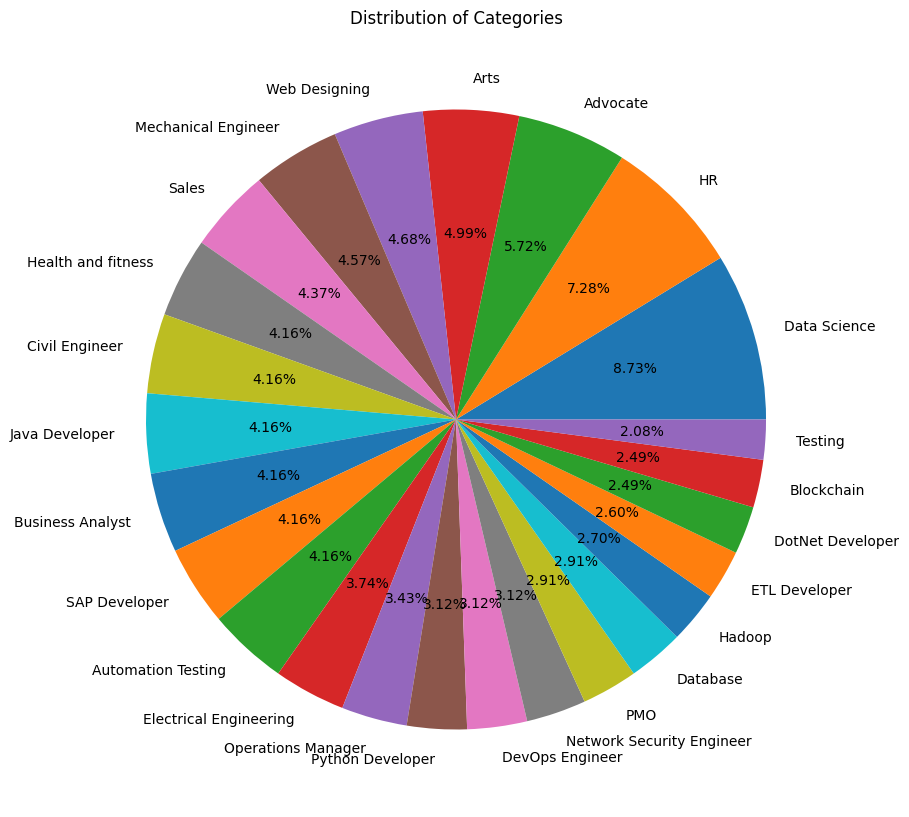

In [4]:
plt.figure(figsize=(10,15))
count = data['Category'].value_counts()
labels = data['Category'].unique()

plt.pie(count, labels=labels, autopct='%1.2f%%')
plt.title('Distribution of Categories')
plt.show()

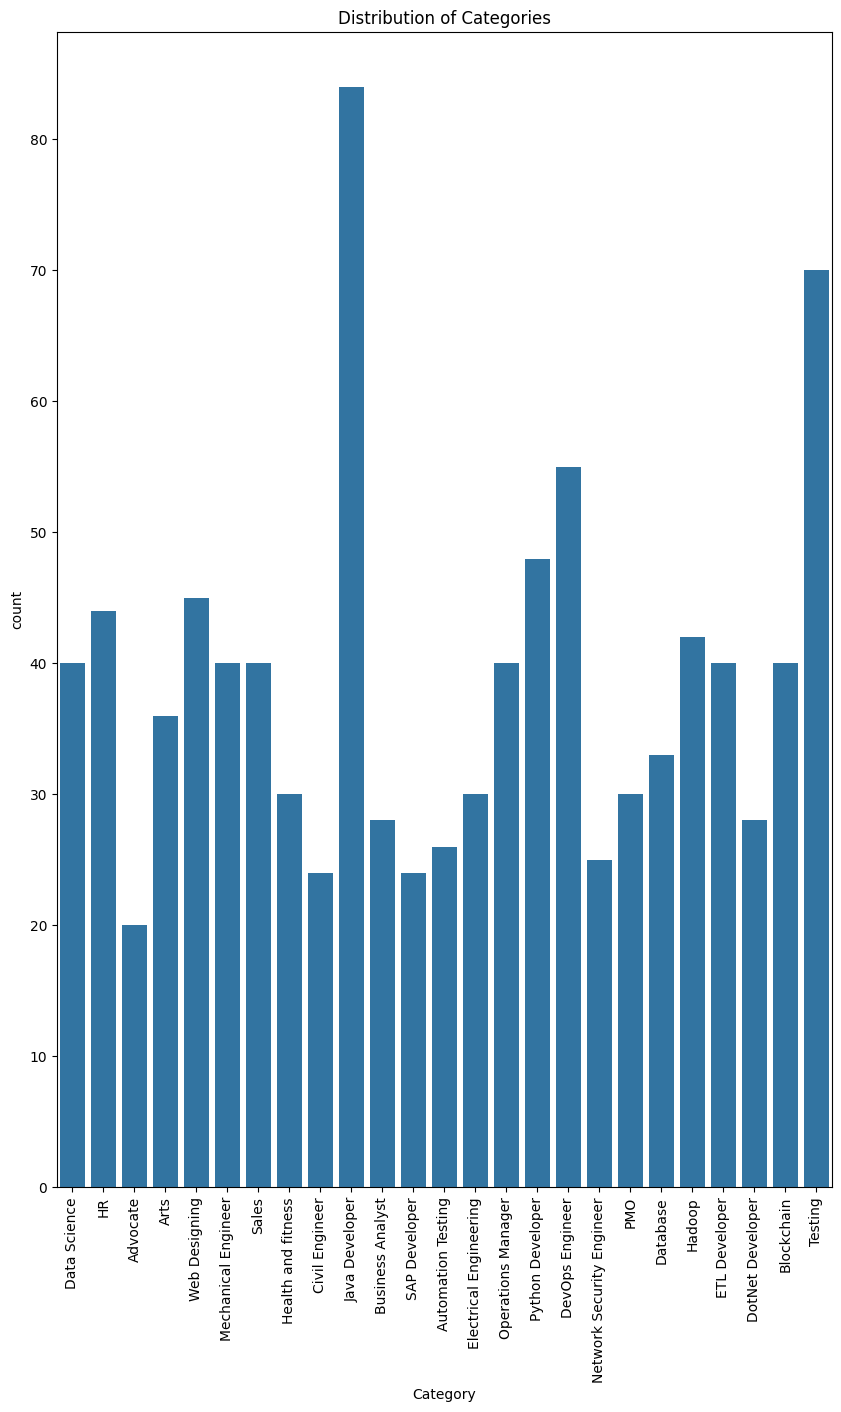

In [5]:
plt.figure(figsize=(10,15))
sns.countplot(data=data, x='Category')
plt.xticks(rotation=90)
plt.title('Distribution of Categories')
plt.show()

# Clean Data (Resume Field)

In [6]:
data['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

What we need to remove is,
*   Hashtags
*   mentions
*   urls
*   special letters
*   punctuations

In [7]:
import re

stop_words = set([
    'the', 'is', 'in', 'and', 'to', 'with', 'a', 'an', 'of', 'for', 'on', 'at',
    'by', 'this', 'that', 'are', 'was', 'it', 'be', 'as', 'from', 'or', 'has',
    'have', 'had', 'but', 'not', 'he', 'she', 'they', 'you', 'we', 'his', 'her'
])

In [8]:
def cleanResume(resumeText) :

    Text = re.sub('http\S+', ' ', resumeText)       # remove URLs
    Text = re.sub('@\S+', ' ', Text)                # remove @mentions
    Text = re.sub('#\S+', ' ', Text)                # remove hashtags
    Text = re.sub('\n', ' ', Text)                  # remove newline characters
    Text = re.sub('\r', ' ', Text)                  # remove carriage returns
    Text = re.sub('[^\w\s]', ' ', Text)             # remove punctuation
    Text = re.sub('\s+', ' ', Text).strip()         # remove extra whitespaces
    Text = re.sub(r"[\u2600-\u26FF\u2700-\u27BF]+", " ", Text)  # remove emoji ranges
    Text = re.sub('RT|CC', '', Text)

    # Lowercase for consistent stopword removal
    Text = Text.lower()

    # Split and remove stopwords
    words = Text.split()
    cleaned_words = [word for word in words if word not in stop_words]

    return ' '.join(cleaned_words)

In [9]:
text = 'welcome to my vlog \n @0810Yash, #Yaaa \r https:091kks.com CC:You  poakks'
cleanResume(text)

'welcome my vlog poakks'

In [10]:
data['CleanResume'] = data['Resume'].apply(lambda x : cleanResume(x))

In [11]:
data['CleanResume'][15]

'skills c basics iot python matlab data science machine learning html microsoft word microsoft excel microsoft powerpoint recognition academic secured first place b tech education details august 2014 may 2018 b tech ghatkesar andhra pradesh aurora s scientific technological institute june 2012 may 2014 secondary education warangal telangana sr junior college data science skill details ms office exprience less than 1 year months c exprience less than 1 year months machine learning exprience less than 1 year months data science exprience less than 1 year months matlab exprience less than 1 year monthscompany details company description'

# Encoding

In [12]:
# Now it's perfect, Now it's time to do encoding of Labels

le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [13]:
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

In [14]:
data['Resume'].isna().sum()

np.int64(0)

In [15]:
tfid = TfidfVectorizer(stop_words='english')


tfid.fit(data['CleanResume'])
tfid_matrix = tfid.transform(data['CleanResume'])

In [16]:
tfid_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164113 stored elements and shape (962, 7371)>

In [17]:
data['RequiredText'] = list(tfid_matrix.toarray())

In [18]:
data.head()

,Category,Resume,CleanResume,RequiredText
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b e uit rg...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,6,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â r â python â sap hana â tableau â sap...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Splitting Data for training and testing

In [19]:
x = data['RequiredText'].copy()
y = data['Category'].copy()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(769,) (193,) (769,) (193,)


# Training Model

In [22]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'Naive Bayes' : MultinomialNB(),
}

In [23]:
for name, model in models.items() :
  model.fit(X_train.tolist(), y_train)
  print(f"{name} trained")

  print(f"Training Accuracy : {model.score(X_train.tolist(), y_train)}")
  print(f"Testing Accuracy : {model.score(X_test.tolist(), y_test)}")

Logistic Regression trained
Training Accuracy : 0.9973992197659298
Testing Accuracy : 0.9948186528497409
Decision Tree trained
Training Accuracy : 1.0
Testing Accuracy : 0.9948186528497409
Random Forest trained
Training Accuracy : 1.0
Testing Accuracy : 0.9948186528497409
Support Vector Machine trained
Training Accuracy : 1.0
Testing Accuracy : 0.9948186528497409
Naive Bayes trained
Training Accuracy : 0.9843953185955787
Testing Accuracy : 0.9637305699481865


In [24]:
# We will take the best model which is Logistic Regression

model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train.tolist(), y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [25]:
model.predict(X_test.tolist())

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [26]:
print(accuracy_score(y_test, model.predict(X_test.tolist())))

0.9948186528497409


In [27]:
print(accuracy_score(y_train, model.predict(X_train.tolist())))

0.9973992197659298


# Taking Output from random input

In [45]:
myResume = "Data analysis, tableau, powerbi, Machine Learning, Deep Learning, NLP"

output = model.predict(tfid.transform([cleanResume(myResume)]))

output = le.inverse_transform(output)
print(output)

['Data Science']


In [30]:
# Dump Model
import pickle

In [31]:
pickle.dump(model, open('resume_screening_model.pkl', 'wb'))

In [33]:
pickle.dump(tfid, open('tfid.pkl', 'wb'))

# Making Predictive System

In [47]:
import pickle

In [48]:
LRC = pickle.load(open('/content/resume_screening_model.pkl', 'rb'))

In [49]:
input_features = tfid.transform([cleanResume(myResume)])

In [50]:
prediction = LRC.predict(input_features)

In [51]:
prediction_output = le.inverse_transform(prediction)

In [52]:
print(prediction_output)

['Data Science']
